In [20]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fnmatch

from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *
from VIGOR_Figure5_Functions import *

plt.style.use('./Figures/paper.mplstyle')

In [21]:
rat_markers = {}
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
            #    'RatF20': 'thcre', 'RatF21': 'thcre', 'RatF22': 'thcre',
            #    'RatM20': 'thcre', 'RatM21': 'thcre', 'RatM22': 'thcre',
               'RatF30': 'DLS', 'RatF31': 'DLS', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'DLS', 'RatM31': 'normal', 'RatM32': 'normal',
               'RatF40': 'DLS', 'RatF41': 'DMS', 'RatF42': 'normal',
               'RatM40': 'normal', 'RatM41': 'DLS', 'RatM42': 'DMS', 'RatM43': 'normal', 

                'RatF50': 'DMS', 'RatF51': 'DLS', 'RatF52': 'DLS',
               'RatM50': 'DMS', 'RatM51': 'DMS', 'RatM52': 'DLS', 'RatM53': 'normal', 'RatM54': 'normal'
               }

intact_map = plt.cm.get_cmap('hsv')
lesion_map = plt.cm.get_cmap('autumn')

# markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
# lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}

markers = {'normal': 'o', 'DLS': 'X', 'DMS': 'x'}
lines = {'normal': '-', 'DLS': '-', 'DMS': '-'}
colormaps = {'normal': intact_map, 'DLS': lesion_map, 'DMS': lesion_map}

# RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54'
                ]
intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 
            'RatM53', 'RatM54'
            ]
    

for index, animal in enumerate(animalList):
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 'd', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 's', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")


for index, animal in enumerate(intact):
    print(colormaps[brainstatus[animal]](index/len(intact)))
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(intact)), 'd', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(intact)), 's', lines[brainstatus[animal]]]
    
    if animal == 'RatF02':
        rat_markers[animal][0] = 'dodgerblue'

(1.0, 0.0, 0.0, 1.0)
(1.0, 0.3937503937503937, 0.0, 1.0)
(1.0, 0.7875007875007874, 0.0, 1.0)
(0.8187488187488188, 1.0, 0.0, 1.0)
(0.424998424998425, 1.0, 0.0, 1.0)
(0.03124934374934376, 1.0, 1.3125013124790507e-06, 1.0)
(0.0, 1.0, 0.3625004724974957, 1.0)
(0.0, 1.0, 0.7562483856335561, 1.0)
(0.0, 0.8500027562527561, 1.0, 1.0)
(0.0, 0.4562523625023627, 1.0, 1.0)
(0.0, 0.062501968751969, 1.0, 1.0)
(0.33124842499842483, 0.0, 1.0, 1.0)
(0.724998818748819, 0.0, 1.0, 1.0)
(1.0, 0.0, 0.8812507875007872, 1.0)
(1.0, 0.0, 0.4875003937503936, 1.0)


In [22]:



# alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
# # vars = alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R
# # names = ('alpha_0', 'alpha_t', 'alpha_R', 'gamma_0', 'gamma_t', 'gamma_R', 
# #         'mu_0', 'mu_t', 'mu_R', 'sigma_0', 'sigma_t', 'sigma_R')

# # v = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
# #         r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]



# vars = alpha_0, alpha_t, gamma_0, gamma_t, gamma_R, mu_0, mu_t
# names = ('alpha_0', 'alpha_t', 'gamma_0', 'gamma_t', 'gamma_R', 'mu_0', 'mu_t')
# labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$"]



# ICC

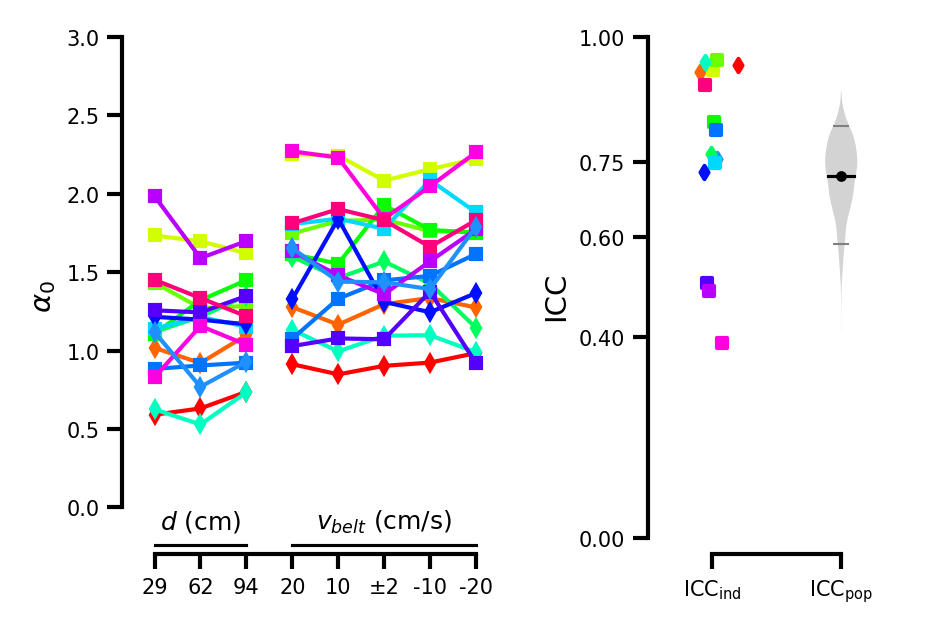

In [23]:
   
def Figure5ALeft(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    
    alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
    x = np.arange(len(conds))

    for animal in intact:
        ydist = np.array([alpha_0[animal][cond] for cond in ["60", "90", "120"]])
        yTM = np.array([alpha_0[animal][cond] for cond in ["20", "10", "2", "rev10", "rev20"]])
        yBetween = np.array([alpha_0[animal][cond] for cond in ["120", "rev20"]])

        zorder = 2 if animal == 'RatF02' else 1
        ax.plot([0, 1, 2], ydist, color=rat_markers[animal][0], marker=rat_markers[animal][1], markersize=np.sqrt(5), zorder=zorder)
        ax.plot([3, 4, 5, 6, 7], yTM, color=rat_markers[animal][0], marker=rat_markers[animal][1], markersize=np.sqrt(5), zorder=zorder)
        # ax.plot([2, 3], yBetween, color=rat_markers[animal][0],lw=.1)


    ax.set_xticks(x)
    ax.set_xticklabels(["29", "62", "94", "20", "10", "±2", "-10", "-20"])
    ax.set_ylabel(r'$\alpha_0$')
    ax.set_ylim(0, 3)
    ax.set_xlim(0, 7)
    # ax.set_xlabel('condition')
    space_axes(ax, y_ratio=.1, x_ratio_left=.1, x_ratio_right=.1)
    annotation_d_vbelt(ax=ax, miny=0)


def annotation_d_vbelt(ax=None, miny=0):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    y = np.diff(sorted([ax.get_ylim()[0], miny]))
    dy = miny - y 

    line_y = (miny-dy) * 0.8
    ax.plot([0, 2], [miny-line_y, miny-line_y], color='k', lw=.75, zorder=1)
    ax.plot([3, 7], [miny-line_y, miny-line_y], color='k', lw=.75, zorder=1)

    text_y = (miny-dy) * 0.3
    ax.annotate(r'$d$' + ' (cm)', xy=(1, miny-text_y), xytext=(1, miny-text_y), ha='center', va='center', fontsize=6)
    ax.annotate(r'$v_{belt}$' + ' (cm/s)', xy=(5, miny-text_y), xytext=(5, miny-text_y), ha='center', va='center', fontsize=6)


def Figure5ARight(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
    populationRi, indivRi, (conf_bottom, conf_top, ICC_bootstrap) = compute_ICC(alpha_0, animalList=intact, bootstrap=True)
    

    for animal in intact: 
        ax.scatter(np.random.normal(0, 0.005), indivRi[animal], 
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)


    ax.plot([.09, .11], [populationRi, populationRi], color='k', lw=.75, zorder=1)
    ax.scatter(.1, populationRi, color='k', s=2.5, zorder=2)
    
    violin_parts = ax.violinplot(positions=[.1], 
                    dataset=[ICC_bootstrap],
                    widths=.025, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('lightgray')
        vp.set_edgecolor('lightgray')
        vp.set_linewidth(0)
        vp.set_alpha(1)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(.5)
    violin_parts['cquantiles'].set_alpha(1)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

    ax.set_ylim(0, 1)
    ax.set_xlim(0, .1)
    ax.set_xticks([0, .1])
    ax.set_xticklabels([r"$\mathrm{ICC_{ind}}$", r"$\mathrm{ICC_{pop}}$"])
    ax.set_ylabel("ICC")
    space_axes(ax, x_ratio_left=.5, x_ratio_right=.5)

    # ax.set_yticks([0, 0.5, 0.75, .9, 1])
    # ax.set_yticks([0.25, 0.625, 0.825, .95], minor=True)
    # ax.set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    ax.set_yticks([0, 0.4, 0.6, 0.75, 1])
    # ax.set_yticks([0.2, 0.5, 0.675, 0.875], minor=True)
    # ax.set_yticklabels(["Poor", "Fair", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)


fig, axs = plt.subplots(1, 2, figsize=(3, 2), gridspec_kw={'width_ratios': [3, 2]})
Figure5ALeft(axs[0])
Figure5ARight(axs[1])


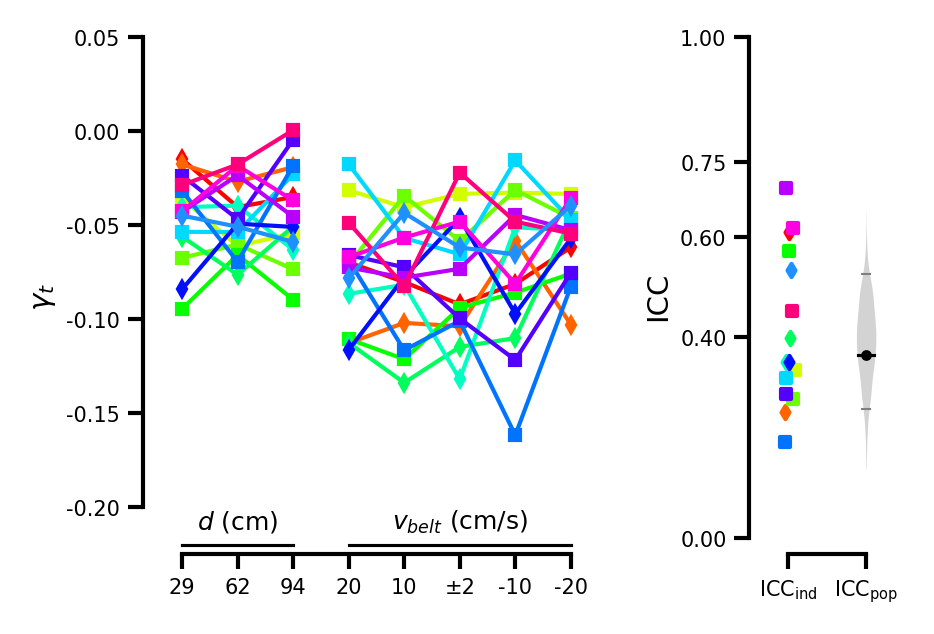

In [24]:
def Figure5BLeft(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
    x = np.arange(len(conds))

    for animal in intact:
        ydist = np.array([gamma_t[animal][cond] for cond in ["60", "90", "120"]])
        yTM = np.array([gamma_t[animal][cond] for cond in ["20", "10", "2", "rev10", "rev20"]])
        yBetween = np.array([gamma_t[animal][cond] for cond in ["120", "rev20"]])

        zorder = 2 if animal == 'RatF02' else 1
        ax.plot([0, 1, 2], ydist, color=rat_markers[animal][0], marker=rat_markers[animal][1], markersize=np.sqrt(5), zorder=zorder)
        ax.plot([3, 4, 5, 6, 7], yTM, color=rat_markers[animal][0], marker=rat_markers[animal][1], markersize=np.sqrt(5), zorder=zorder)

    ax.set_xticks(x)
    ax.set_xticklabels(["29", "62", "94", "20", "10", "±2", "-10", "-20"])
    ax.set_ylabel(r'$\gamma_t$')
    ax.set_xlim(0, 7)
    ax.set_ylim(-0.2, .05)
    space_axes(ax, y_ratio=.1, x_ratio_left=.1, x_ratio_right=.1)

    # ax.plot([0, 2], [-.22, -.22], color='k', lw=.75, zorder=1)
    # ax.plot([3, 7], [-.22, -.22], color='k', lw=.75, zorder=1)
    # ax.annotate(r'$d$' + ' (cm)', xy=(1, -.2125), xytext=(1, -.2125), ha='center', va='center', fontsize=6)
    # ax.annotate(r'$v_{belt}$' + ' (cm/s)', xy=(5, -.2125), xytext=(5, -.2125), ha='center', va='center', fontsize=6)
    annotation_d_vbelt(ax=ax, miny=-0.2)

def Figure5BRight(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
    populationRi, indivRi, (conf_bottom, conf_top, ICC_bootstrap) = compute_ICC(gamma_t, animalList=intact, bootstrap=True)
    

    for animal in intact: 
        ax.scatter(np.random.normal(0, 0.005), indivRi[animal], 
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)


    ax.plot([.09, .11], [populationRi, populationRi], color='k', lw=.75, zorder=1)
    ax.scatter(.1, populationRi, color='k', s=2.5, zorder=2)
    
    violin_parts = ax.violinplot(positions=[.1], 
                    dataset=[ICC_bootstrap],
                    widths=.025, showextrema=False, 
                    quantiles=[0.05, 0.95])
    
    for vp in violin_parts['bodies']:
        vp.set_facecolor('lightgray')
        vp.set_edgecolor('lightgray')
        vp.set_linewidth(0)
        vp.set_alpha(1)
        vp.set_zorder(0)
    # for vp in violin_parts['cquantiles']:
    violin_parts['cquantiles'].set_facecolor('gray')
    violin_parts['cquantiles'].set_edgecolor('gray')
    violin_parts['cquantiles'].set_linewidth(.5)
    violin_parts['cquantiles'].set_alpha(1)
    violin_parts['cquantiles'].set_zorder(1)
    
    for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
        try:
            vp = violin_parts[partname]
            vp.set_edgecolor('gray')
            vp.set_linewidth(0)
            vp.set_alpha(0)
        except:
            pass

    ax.set_ylim(0, 1)
    ax.set_xlim(0, .1)
    ax.set_xticks([0, .1])
    ax.set_xticklabels([r"$\mathrm{ICC_{ind}}$", r"$\mathrm{ICC_{pop}}$"])
    ax.set_ylabel("ICC")
    space_axes(ax, x_ratio_left=.5, x_ratio_right=.5)

    # ax.set_yticks([0, 0.5, 0.75, .9, 1])
    # ax.set_yticks([0.25, 0.625, 0.825, .95], minor=True)
    # ax.set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    ax.set_yticks([0, 0.4, 0.6, 0.75, 1])
    # ax.set_yticks([0.2, 0.5, 0.675, 0.875], minor=True)
    # ax.set_yticklabels(["Poor", "Fair", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)

fig, axs = plt.subplots(1, 2, figsize=(3, 2), gridspec_kw={'width_ratios': [3, 1]})
Figure5BLeft(axs[0])
Figure5BRight(axs[1])

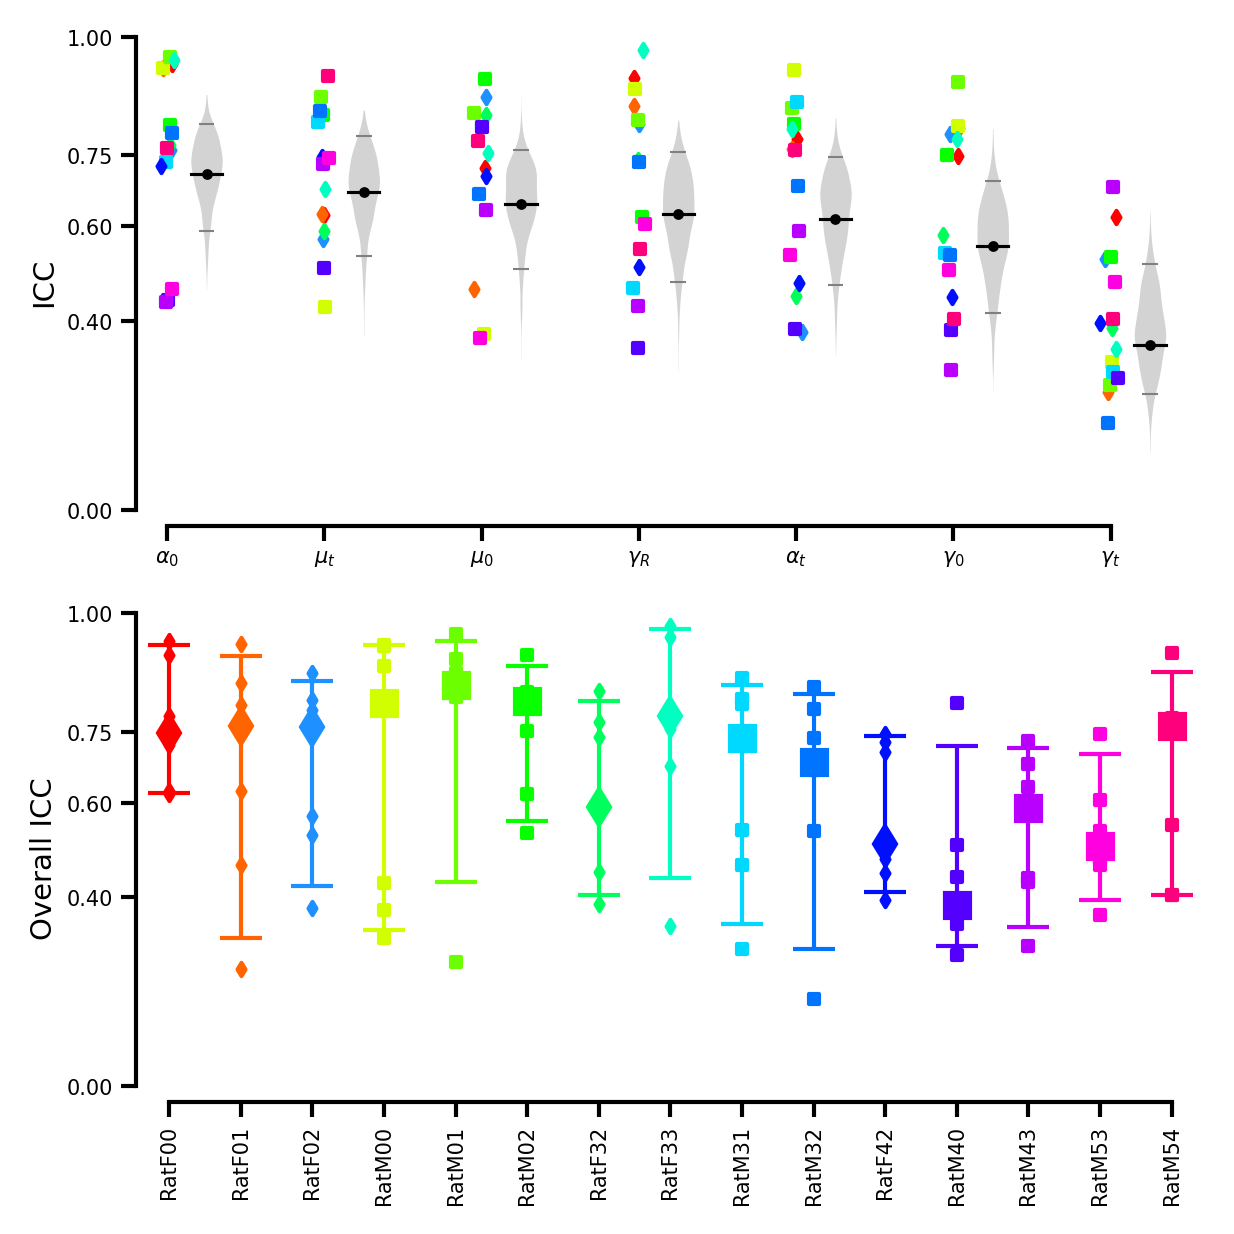

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4))

def Figure5C(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
    vars = alpha_0, alpha_t, gamma_0, gamma_t, gamma_R, mu_0, mu_t
    names = ('alpha_0', 'alpha_t', 'gamma_0', 'gamma_t', 'gamma_R', 'mu_0', 'mu_t')
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$"]

    populationRi = {}
    conf_bottom = {}
    conf_top = {}
    indivRi = {}
    ICC_bootstrap = {}

    if os.path.exists("picklejar/ICC_resamples.p"):
        populationRi, indivRi, conf_bottom, conf_top, ICC_bootstrap = pickle.load(open("picklejar/ICC_resamples.p", "rb"))
    else:
        for i, (var, name) in enumerate(zip(vars, names)):
            populationRi[name], indivRi[name], (conf_bottom[name], conf_top[name], ICC_bootstrap[name]) = compute_ICC(var, animalList=intact, bootstrap=True)
        pickle.dump([populationRi, indivRi, conf_bottom, conf_top, ICC_bootstrap], open("picklejar/ICC_resamples.p", "wb"))

    # sort the vars by populationRi
    sorted_names = [x for _,x in sorted(zip(populationRi.values(), names), reverse=True)]
    sorted_labels = [x for _,x in sorted(zip(populationRi.values(), labels), reverse=True)]


    for i, name in enumerate(sorted_names):
        for animal in intact:
            ax.scatter(np.random.normal(i, 0.025), indivRi[name][animal], color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)

        # femalesRi = [indivRi[name][animal] for animal in intact if 'F' in animal]
        # malesRi = [indivRi[name][animal] for animal in intact if 'M' in animal]
        # print(f'{name} M vs F p = {exact_mc_perm_test(malesRi, femalesRi)}')
        # print(f'{name} M vs F p = {stats.mannwhitneyu(malesRi, femalesRi)}')

        line = 0.2/2
        ax.plot([i+.25-line, i+.25+line], [populationRi[name], populationRi[name]], color='k', lw=.75, zorder=1)
        ax.scatter(i+.25, populationRi[name], color='k', s=2.5, zorder=2)

        violin_parts = ax.violinplot(positions=[i+.25], 
                        dataset=[ICC_bootstrap[name]],
                        widths=.2, showextrema=False, 
                        quantiles=[0.05, 0.95])
        
        for vp in violin_parts['bodies']:
            vp.set_facecolor('lightgray')
            vp.set_edgecolor('lightgray')
            vp.set_linewidth(0)
            vp.set_alpha(1)
            vp.set_zorder(0)

        violin_parts['cquantiles'].set_facecolor('gray')
        violin_parts['cquantiles'].set_edgecolor('gray')
        violin_parts['cquantiles'].set_linewidth(.5)
        violin_parts['cquantiles'].set_alpha(1)
        violin_parts['cquantiles'].set_zorder(1)
        
        for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
            try:
                vp = violin_parts[partname]
                vp.set_edgecolor('gray')
                vp.set_linewidth(0)
                vp.set_alpha(0)
            except:
                pass

    ax.set_xlim(0, len(sorted_labels)-1)
    ax.set_xticks(range(len(sorted_labels)))
    ax.set_xticklabels(sorted_labels)
    ax.set_ylabel('ICC')
    ax.set_ylim(0, 1)
    # ax.set_yticklabels('')
    # ax.set_yticks([0, 0.5, 0.75, .9, 1])
    # ax.set_yticks([0.25, 0.625, 0.825, .95], minor=True)
    # ax.set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    ax.set_yticks([0, 0.4, 0.6, 0.75, 1])
    # ax.set_yticks([0.2, 0.5, 0.675, 0.875], minor=True)
    # ax.set_yticklabels(["Poor", "Fair", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    space_axes(ax, x_ratio_right=.1)


def Figure5D(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    alpha_0, alpha_t, alpha_R, gamma_0, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma_0, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
    vars = alpha_0, alpha_t, gamma_0, gamma_t, gamma_R, mu_0, mu_t
    names = ('alpha_0', 'alpha_t', 'gamma_0', 'gamma_t', 'gamma_R', 'mu_0', 'mu_t')
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$"]

    populationRi = {}
    conf_bottom = {}
    conf_top = {}
    indivRi = {}
    ICC_bootstrap = {}

    if os.path.exists("picklejar/ICC_resamples.p"):
        populationRi, indivRi, conf_bottom, conf_top, ICC_bootstrap = pickle.load(open("picklejar/ICC_resamples.p", "rb"))
    else:
        for i, (var, name) in enumerate(zip(vars, names)):
            populationRi[name], indivRi[name], (conf_bottom[name], conf_top[name], ICC_bootstrap[name]) = compute_ICC(var, animalList=intact, bootstrap=True)
        pickle.dump([populationRi, indivRi, conf_bottom, conf_top, ICC_bootstrap], open("picklejar/ICC_resamples.p", "wb"))

    for i, animal in enumerate(intact):

        ax.scatter([i] * len([indivRi[name][animal] for name in names]),
                        [indivRi[name][animal] for name in names],
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], s=5)
                        
        lower = np.percentile([indivRi[name][animal] for name in names], 5)
        upper = np.percentile([indivRi[name][animal] for name in names], 95)

        ax.errorbar(i, np.median([indivRi[name][animal] for name in names]), 
                        yerr=[[np.median([indivRi[name][animal] for name in names]) - lower], 
                                [upper - np.median([indivRi[name][animal] for name in names])]],
                        color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                        capsize=5, capthick=1, elinewidth=1)

    ax.set_xlim(0, len(intact)-1)
    ax.set_xticks(range(len(intact)))
    ax.set_xticklabels(intact, rotation=90)
    ax.set_ylabel('Overall ICC')
    ax.set_ylim(0, 1)
    # ax.set_yticklabels('')
    # ax.set_yticks([0, 0.5, 0.75, .9, 1])
    # ax.set_yticks([0.25, 0.625, 0.825, .95], minor=True)
    # ax.set_yticklabels(["Poor", "Moderate", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    ax.set_yticks([0, 0.4, 0.6, 0.75, 1])   
    # ax.set_yticks([0.2, 0.5, 0.675, 0.875], minor=True)
    # ax.set_yticklabels(["Poor", "Fair", "Good", "Excellent"], minor=True)
    # ax.tick_params(which='minor', length=0)
    space_axes(ax)


Figure5C(axs[0])
Figure5D(axs[1])

In [26]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.cluster import hierarchy


def do_PCA(n_comp=2):
    intact = ['RatF00', 'RatF01',  'RatF02', 'RatM00', 'RatM01', 'RatM02', 
                'RatF32', 'RatF33', 'RatM31', 'RatM32', 
                'RatF42', 'RatM40', 'RatM43', 
                'RatM53', 'RatM54']
            
    animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
                'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
                'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43', 
                'RatF50', 'RatF51', 'RatF52', 'RatM50', 'RatM51', 'RatM52', 'RatM53', 'RatM54']

    alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/TESTintact_lesionFITS.p", "rb"))
    # vars = alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R
    # names = 'alpha', 'alpha_t', 'alpha_R', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t', 'mu_R', 'sigma', 'sigma_t', 'sigma_R'

    vars = alpha, alpha_t, gamma, gamma_t, gamma_R, mu, mu_t,
    names = 'alpha', 'alpha_t', 'gamma', 'gamma_t', 'gamma_R', 'mu', 'mu_t'

    df = pd.DataFrame(index=intact)
    for var, name in zip(vars, names):
        l = np.array(list(compute_intercept(var, intact).values()))
        df[name] = l / np.std(l)  # normalize by std to have a mean of 0 and std of 1

    data = df.to_numpy()
    labels = df.index.to_numpy()
    variables = df.columns.to_numpy()

    pca = PCA(n_components=n_comp) # estimate only 2 PCs
    X_new = pca.fit_transform(data) # project the original data into the PCA space

    return X_new, pca

do_PCA()

(array([[-2.84869731,  0.636085  ],
        [-2.02193751, -0.07007218],
        [-2.44452398,  2.74766774],
        [ 2.06638842,  0.83291848],
        [ 1.02351622, -0.19124711],
        [-0.12195838, -0.60902735],
        [-2.02752563, -0.98353883],
        [-2.48681855, -0.23408655],
        [ 3.47466632, -0.23102101],
        [-0.46529531, -1.14307138],
        [-0.22847909, -1.98265378],
        [-0.58992072, -0.7005084 ],
        [ 2.50213859, -0.68275428],
        [ 1.984491  ,  1.89956841],
        [ 2.18395594,  0.71174123]]),
 PCA(n_components=2))

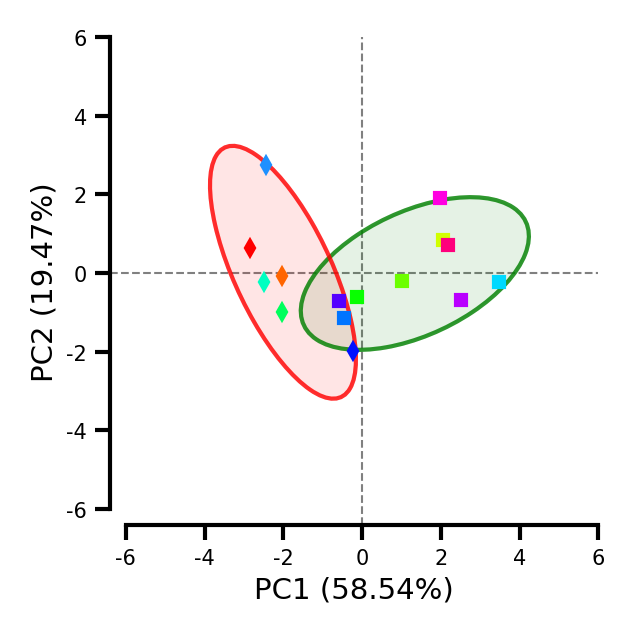

In [27]:
def Figure5E(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    # labels = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$"]
    score, pca = do_PCA()

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2

    x_males, y_males = [], []
    x_females, y_females = [], []

    for i, animal in enumerate(intact):
        ax.plot(x[i], y[i], linestyle='None',
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    markersize=2.5, zorder=10,
                    # mew=0.5, mec='k'
                    )
        if 'M' in animal:
            x_males.append(x[i])
            y_males.append(y[i])
        else:
            x_females.append(x[i])
            y_females.append(y[i])
    
    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=-1)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=-1)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

    confidence_ellipse(np.array(x_males).flatten(), np.array(y_males).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_females).flatten(), np.array(y_females).flatten(), color='r', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    space_axes(ax, x_ratio_right=0)

Figure5E()

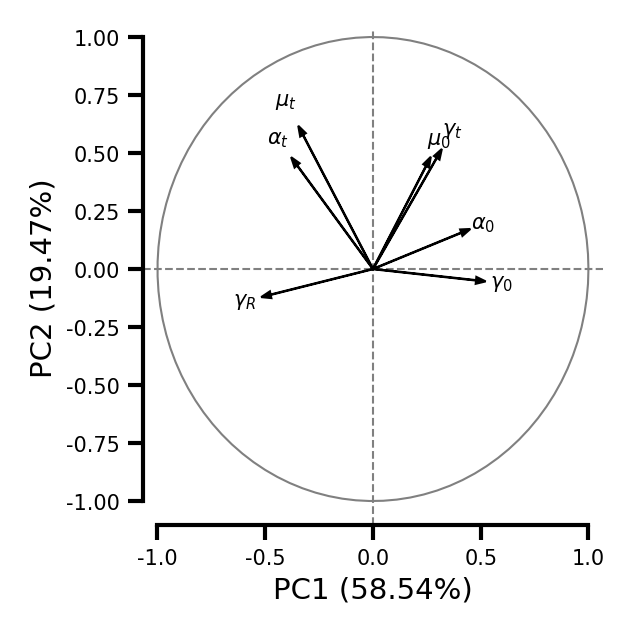

In [28]:
def Figure5F(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    # labels = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$"]
    score, pca = do_PCA()

    coeff = np.transpose(pca.components_[0:2, :])


    for i in range(len(labels)):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], 
                color='k', linestyle='-', linewidth=.5, width=0.002, head_width=0.03, zorder=1)

        offset = 1.25
        x_offset, y_offset = 0, 0
        ax.text(coeff[i, 0]*offset+x_offset, coeff[i, 1]*offset+y_offset, labels[i], 
                color='k', ha='center', va='center', fontsize=5)


    # plot circle
    theta = np.linspace(0, 2*np.pi, 100)
    radius = 1
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    ax.plot(x, y, color='gray', linewidth=.5, zorder=0)


    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1-1/30, 1+1/30)
    space_axes(ax)
    ax.spines['left'].set_bounds(-1, 1)

Figure5F()

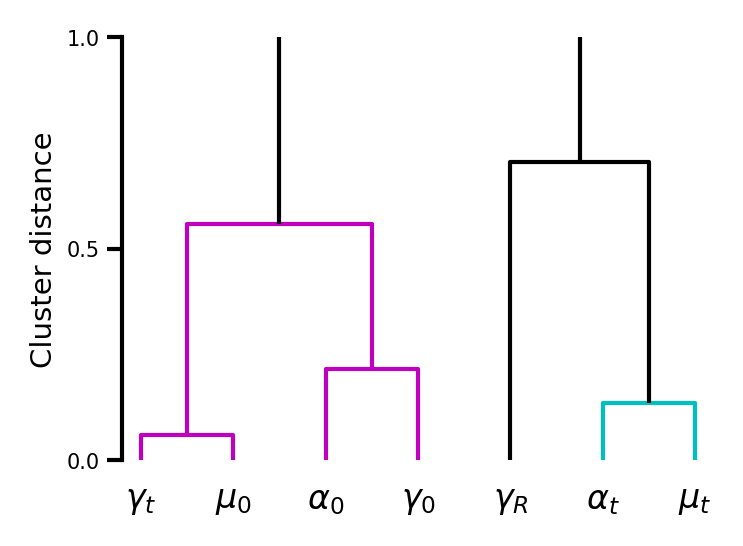

In [29]:
def Figure5G(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(cm2inch(6), cm2inch(13)/3))

    # labels = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$"]
    score, pca = do_PCA(n_comp=2)

    hierarchy.set_link_color_palette(['m', 'c'])
    loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2',], index=labels)

    cl_mergings = linkage(loadings, method="complete", metric='euclidean')
    dendrogram(cl_mergings, labels=labels, ax=ax, above_threshold_color='k', color_threshold=0.6, leaf_font_size=8)
    ax.set_xlim(5, 65)
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.5, 1])
    ax.set_ylabel('Cluster distance')
    ax.spines['bottom'].set_visible(False)
    space_axes(ax, y_ratio=0)

Figure5G()

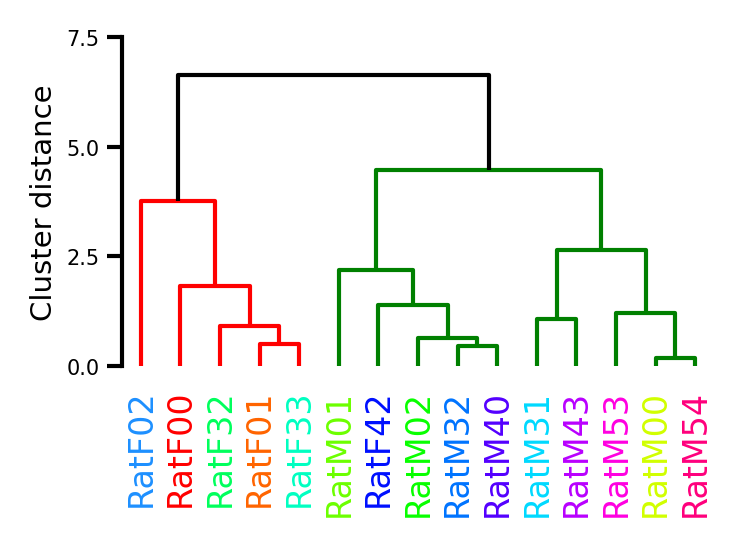

In [30]:
def Figure5H(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(cm2inch(6), cm2inch(13)/3))

    # labels = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$"]
    score, pca = do_PCA(n_comp=2)

    df_ = pd.DataFrame(score, index=intact, columns=['PC1', 'PC2', ])
    hierarchy.set_link_color_palette(['r', 'g'])
    # cl_mergings = linkage(df_, method="average", metric='euclidean')
    cl_mergings = linkage(df_, method='complete', metric='euclidean')
    dendrogram(cl_mergings, labels=intact, #orientation='left');
                    orientation='top', leaf_rotation=90, ax=ax, 
                    above_threshold_color='k', color_threshold=5, leaf_font_size=8)
    # cl_cluster_labels = cut_tree(cl_mergings, n_clusters=2).reshape(-1, )

    # ax.set_xticklabels(intact, rotation=90)
    xlbls = ax.get_xticklabels()
    for lbl in xlbls:
        lbl.set_color(rat_markers[lbl.get_text()][0])
    ax.set_xlim(5, 145)
    ax.set_ylim(0, 7.5)
    ax.set_yticks([0, 2.5, 5, 7.5])
    ax.spines['bottom'].set_visible(False)
    ax.set_ylabel('Cluster distance')
    space_axes(ax, y_ratio=0)


Figure5H()

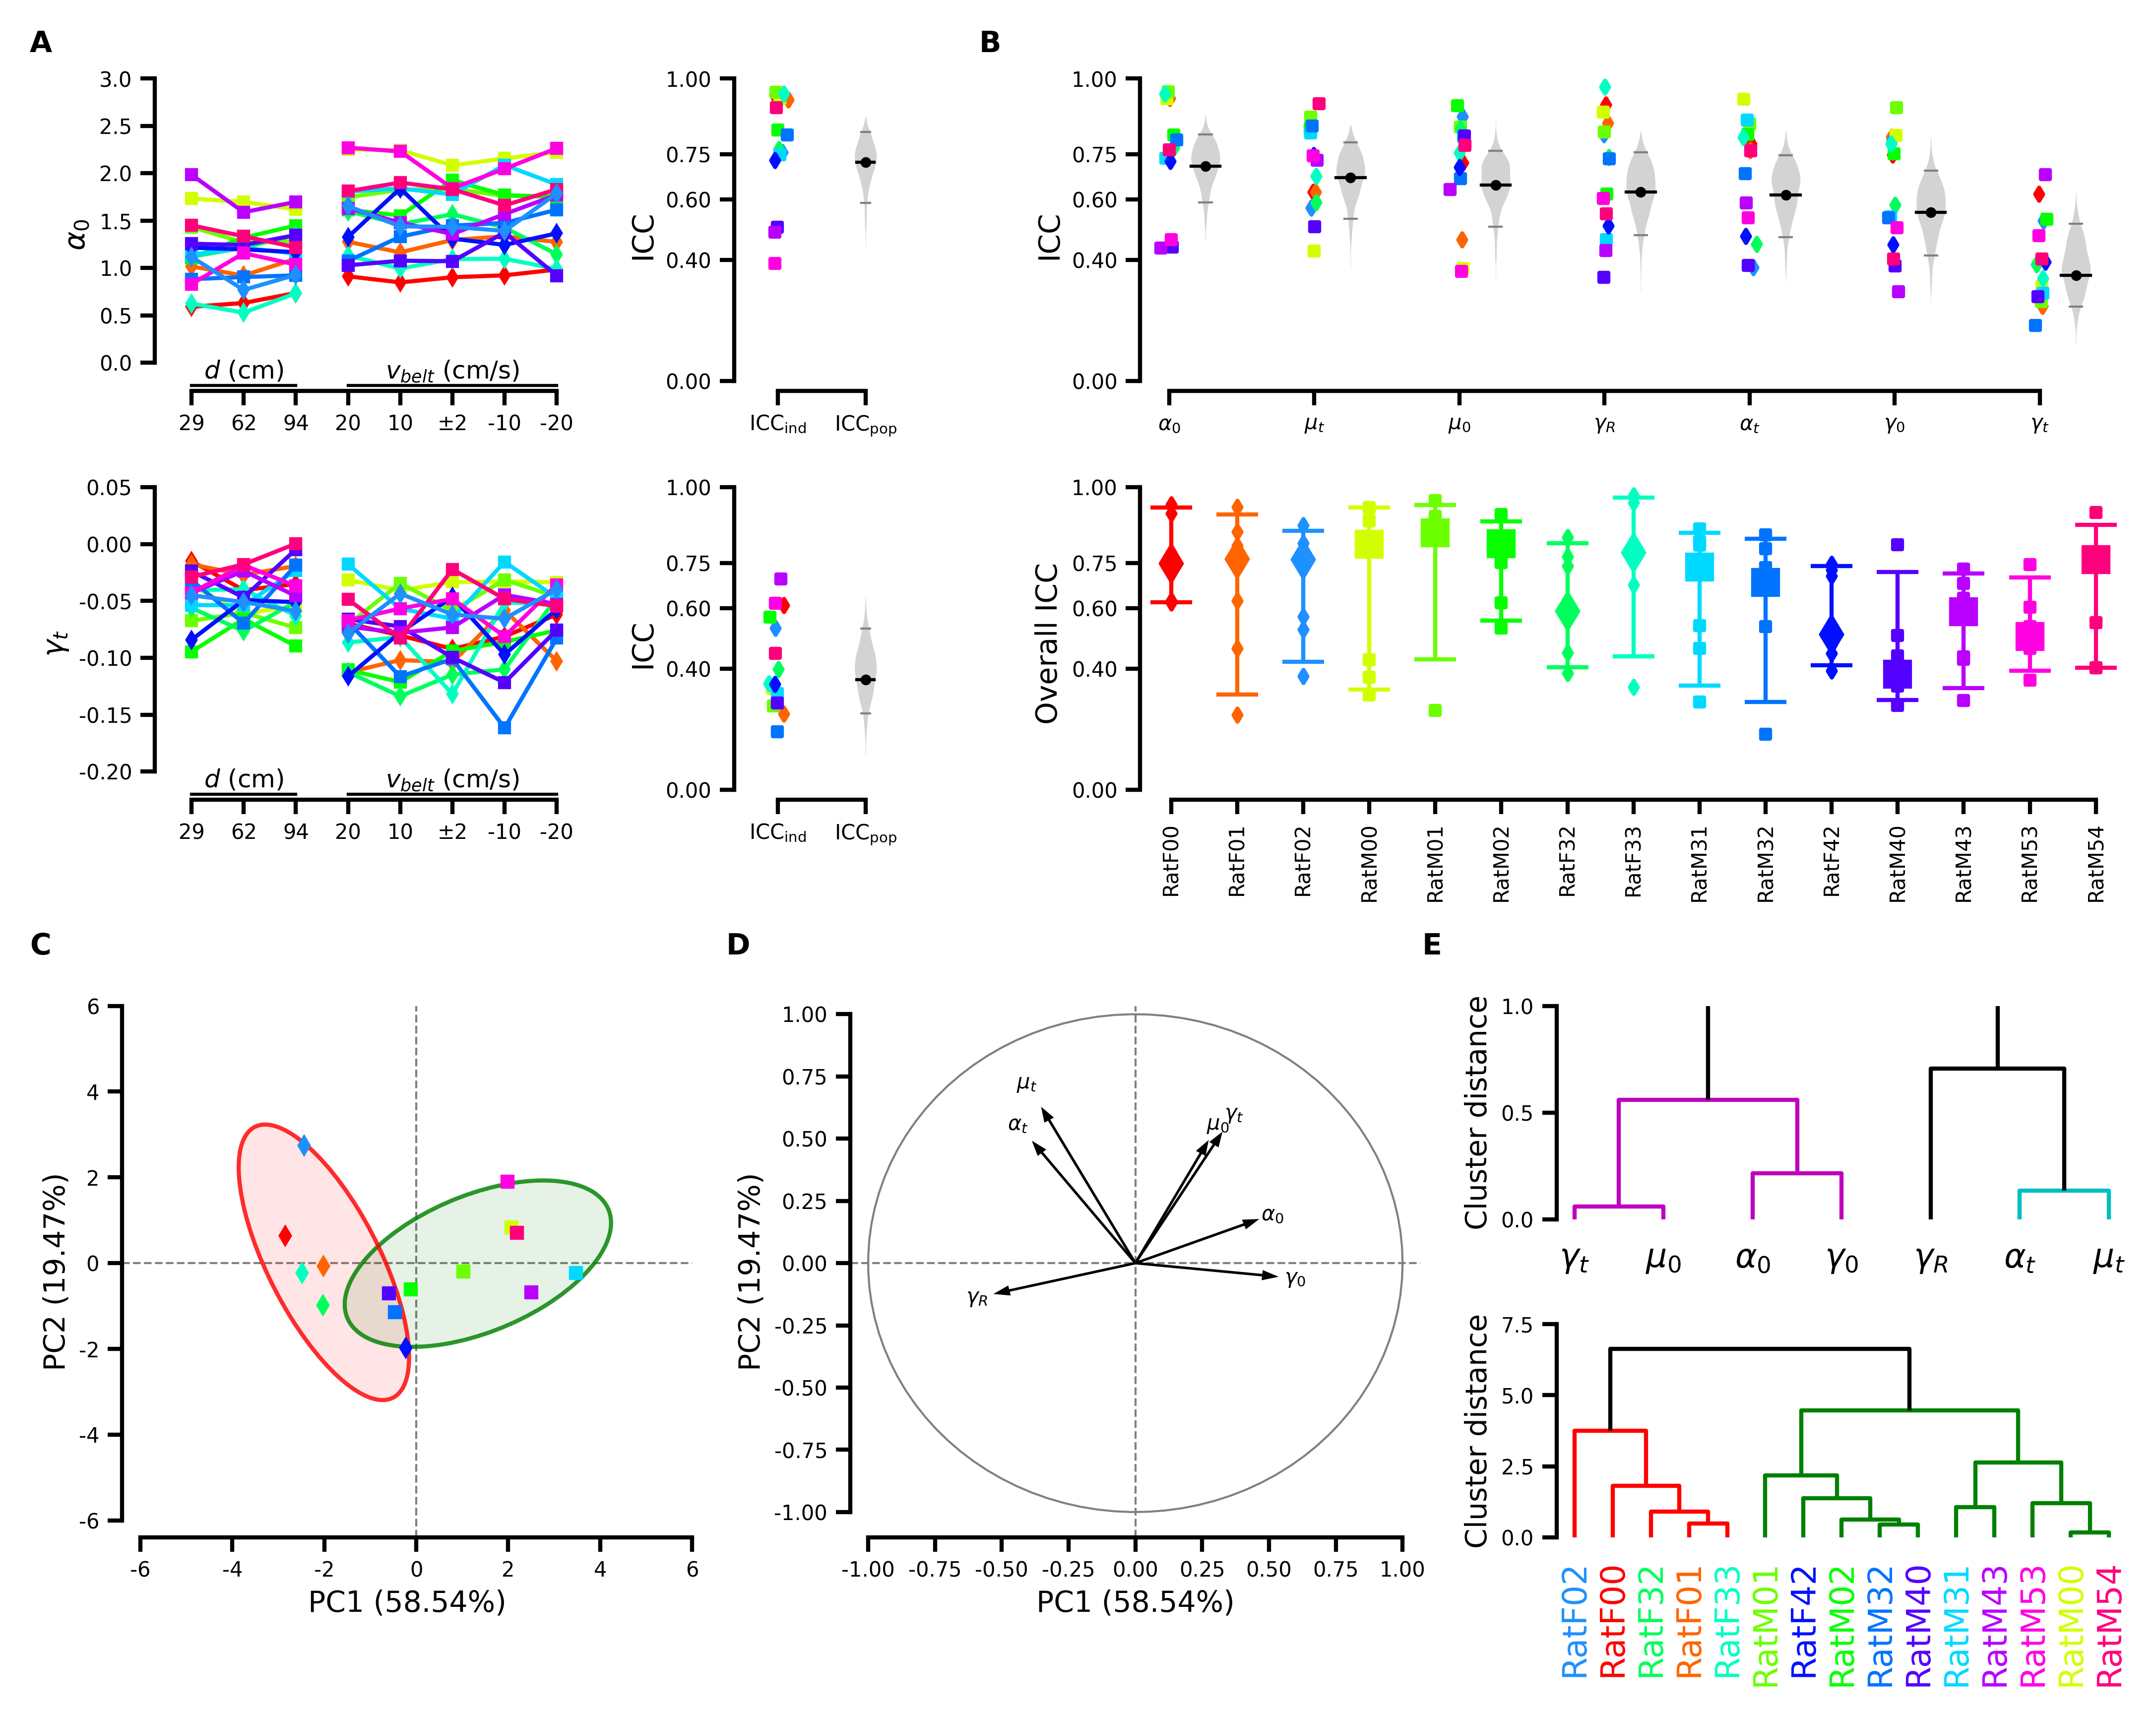

In [31]:
fig=plt.figure(figsize=(cm2inch(18), cm2inch(14)), dpi=600, constrained_layout=True, facecolor='w')

gs0 = fig.add_gridspec(3, 1 , hspace=0.5, height_ratios=[12, 1, 10])

row1 = gs0[0].subgridspec(2, 4, width_ratios=[2, .8, .25, 4.5])
ax_alpha_0 = plt.subplot(row1[0, 0])
ax_ICC_alpha_0 = plt.subplot(row1[0, 1])
ax_RI_params = plt.subplot(row1[0, 3])

ax_gamma_t = plt.subplot(row1[1, 0])
ax_ICC_gamma_t = plt.subplot(row1[1, 1])
ax_RI_rats = plt.subplot(row1[1, 3])


row3 = gs0[2].subgridspec(2, 3, width_ratios=[4, 4, 4])
ax_PCA_params = plt.subplot(row3[:, 0])
ax_PCA_rats = plt.subplot(row3[:, 1])
ax_PCA_params_hierachical = plt.subplot(row3[0, 2])
ax_PCA_rats_hierachical = plt.subplot(row3[1, 2])




figuresLabels={"A":[0.00, 1.00], "B":[0.45, 1.00], 
                "C":[0.00, 0.45], "D":[0.33, 0.45], "E":[0.66, 0.45]}

for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1], label, figure=fig, 
            weight='bold', fontsize=7, ha='left', va='bottom')


Figure5ALeft(ax_alpha_0)
Figure5ARight(ax_ICC_alpha_0)
Figure5C(ax_RI_params)

Figure5BLeft(ax_gamma_t)
Figure5BRight(ax_ICC_gamma_t)
Figure5D(ax_RI_rats)

Figure5E(ax_PCA_params)
Figure5F(ax_PCA_rats)
Figure5G(ax_PCA_params_hierachical)
Figure5H(ax_PCA_rats_hierachical)

plt.savefig("/home/david/Desktop/code/Figure_5.pdf", facecolor='w', 
                edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)


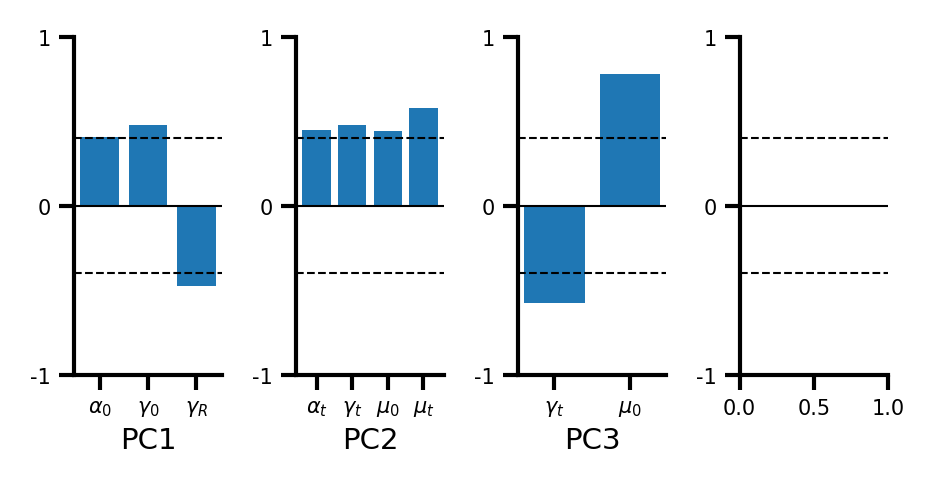

In [32]:
pca = do_PCA(n_comp=3)[1]
v = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", 
        r'$\mu_0$', r"$\mu_t$"]


limitPos = 0.4
limitNeg = -0.4
# filter out the features that are > 0.5 or < -0.5
important_features_PC1 = [_ > limitPos or _ < limitNeg for _ in pca.components_[0, :]]
strenght_important_features_PC1 = [_ for _ in pca.components_[0, :] if _ > limitPos or _ < limitNeg]
labels_PC1 = [v[i] for i, x in enumerate(important_features_PC1) if x]

important_features_PC2 = [_ > limitPos or _ < limitNeg for _ in pca.components_[1, :]]
strenght_important_features_PC2 = [_ for _ in pca.components_[1, :] if _ > limitPos or _ < limitNeg]
labels_PC2 = [v[i] for i, x in enumerate(important_features_PC2) if x]

important_features_PC3 = [_ > limitPos or _ < limitNeg for _ in pca.components_[2, :]]
strenght_important_features_PC3 = [_ for _ in pca.components_[2, :] if _ > limitPos or _ < limitNeg]
labels_PC3 = [v[i] for i, x in enumerate(important_features_PC3) if x]

# important_features_PC4 = [_ > limitPos or _ < limitNeg for _ in pca.components_[3, :]]
# strenght_important_features_PC4 = [_ for _ in pca.components_[3, :] if _ > limitPos or _ < limitNeg]
# labels_PC4 = [v[i] for i, x in enumerate(important_features_PC4) if x]



fig, axs = plt.subplots(1, 4, figsize=(3, 1.5))
axs[0].bar(labels_PC1, strenght_important_features_PC1, )
axs[0].set_xlabel('PC1')
axs[1].bar(labels_PC2, strenght_important_features_PC2, )
axs[1].set_xlabel('PC2')
axs[2].bar(labels_PC3, strenght_important_features_PC3, )
axs[2].set_xlabel('PC3')
# axs[3].bar(labels_PC4, strenght_important_features_PC4, )
# axs[3].set_xlabel('PC4')

for ax in axs:
    ax.set_ylim(-1, 1)
    ax.set_yticks([-1, 0, 1])
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axhline(limitPos, color='black', linewidth=0.5, linestyle='--')
    ax.axhline(limitNeg, color='black', linewidth=0.5, linestyle='--')

In [33]:
pca.explained_variance_ratio_

array([0.58538222, 0.19471696, 0.10150906])

In [34]:
np.cumsum(pca.explained_variance_ratio_[0:4])

array([0.58538222, 0.78009917, 0.88160823])

RatF00 -2.848697311033637 0.6360850042595604 -0.45501386887753814
RatF01 -2.0219375149026866 -0.07007217689095094 -0.26210703868750945
RatF02 -2.444523982722698 2.747667744398153 -0.38684158944995156
RatM00 2.0663884222894926 0.8329184789470362 -0.5400494371303599
RatM01 1.02351622333414 -0.19124710561325345 -0.6785560200127843
RatM02 -0.12195838113687545 -0.6090273543142479 1.599360522133071
RatF32 -2.027525628349402 -0.9835388261472756 0.2602726909345433
RatF33 -2.486818545956899 -0.23408654680984675 -0.30738590131731264
RatM31 3.4746663215793374 -0.23102100576450443 -0.3779879890904428
RatM32 -0.46529531327804946 -1.1430713829340906 1.678390363949265
RatF42 -0.2284790900162086 -1.9826537821131298 -0.6880780822868712
RatM40 -0.5899207229303681 -0.7005084029423628 -0.3863281296851416
RatM43 2.5021385892863908 -0.6827542826559421 -0.5048904408669197
RatM53 1.984490997812316 1.8995684120813365 1.6138464756033677
RatM54 2.183955936025149 0.7117412264995202 -0.5646315552154156


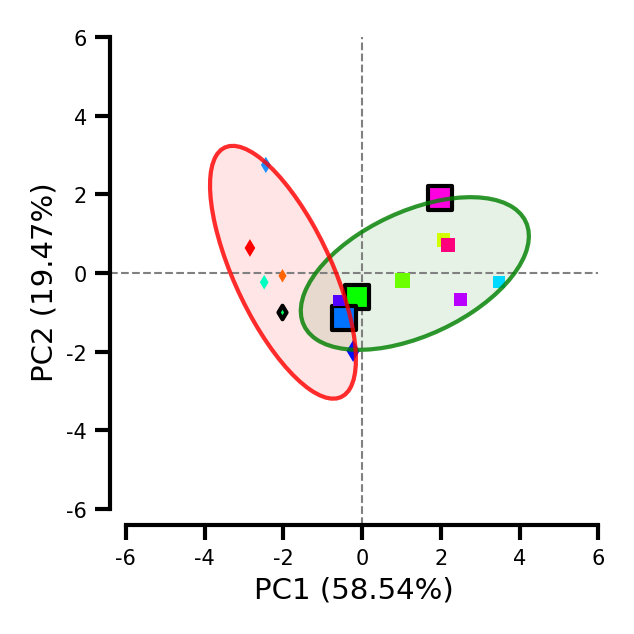

In [35]:
def Figure5E(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    # labels = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$"]
    score, pca = do_PCA(n_comp=3)

    x = score[:,0]  # PC1
    y = score[:,1]  # PC2
    z = score[:,2]  # PC3

    x_males, y_males = [], []
    x_females, y_females = [], []

    for i, animal in enumerate(intact):
        print(animal, x[i], y[i], z[i])
        ax.scatter(x[i], y[i],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], 
                    s=abs(z[i])*20, edgecolors='k' if z[i] > 0 else 'none', linewidths=1)
                    # s=np.sqrt(5))
        if 'M' in animal:
            x_males.append(x[i])
            y_males.append(y[i])
        else:
            x_females.append(x[i])
            y_females.append(y[i])
    
    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

    confidence_ellipse(np.array(x_males).flatten(), np.array(y_males).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_females).flatten(), np.array(y_females).flatten(), color='r', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    space_axes(ax, x_ratio_right=0)

Figure5E()

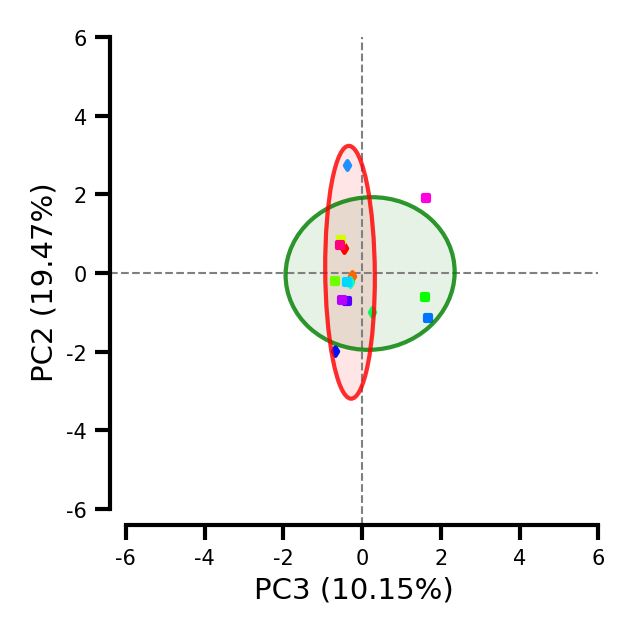

In [36]:
def Figure5E(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    # labels = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
    labels = [r'$\alpha_0$', r"$\alpha_t$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$", r'$\mu_0$', r"$\mu_t$"]
    score, pca = do_PCA(n_comp=3)

    x = score[:,2]  # PC1
    y = score[:,1]  # PC2

    x_males, y_males = [], []
    x_females, y_females = [], []

    for i, animal in enumerate(intact):
        ax.scatter(x[i], y[i],
                    color=rat_markers[animal][0], marker=rat_markers[animal][1], s=np.sqrt(5))
        if 'M' in animal:
            x_males.append(x[i])
            y_males.append(y[i])
        else:
            x_females.append(x[i])
            y_females.append(y[i])
    
    ax.axhline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)
    ax.axvline(0, color='gray', linestyle='--', linewidth=.5, zorder=0)

    ax.set_xlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

    confidence_ellipse(np.array(x_males).flatten(), np.array(y_males).flatten(), color='g', ax=ax)
    confidence_ellipse(np.array(x_females).flatten(), np.array(y_females).flatten(), color='r', ax=ax)    

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    space_axes(ax, x_ratio_right=0)

Figure5E()